<a href="https://colab.research.google.com/github/guilhermelaviola/IntegratingPracticeInDataScienceForBusiness/blob/main/SalesForecastingandFraudDetectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Building and Evaluating Machine Learning Models for Sales Forecasting and Fraud Detection**


In [2]:
# Importing all the necessary libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# **Part 1: Sales Forecasting**

Database Creation and Manipulation:
1. Generate a fictitious database with monthly sales data and promotional events.
2. Data Division: Separate the data into training and testing sets.
3. Model Building and Evaluation: Create and train a linear regression model. Make predictions and evaluate performance using appropriate metrics.

In [13]:
np.random.seed(42)

months = np.arange(1, 25)
sales = np.random.normal(200, 50, 24)
events = np.random.choice([0, 1], size=24)

df_sales = pd.DataFrame({
    'Months': months,
    'Sales': sales,
    'Events': events
})

In [14]:
X_sales = df_sales[['Months', 'Events']]
y_sales = df_sales['Sales']

X_train_sales, X_test_sales, y_train_sales, y_test_sales = train_test_split(X_sales, y_sales, test_size=0.3, random_state=42)

Mean Squared Error (MSE): 3048.9676839648832
R2 Score (R²): -1.103641785560324


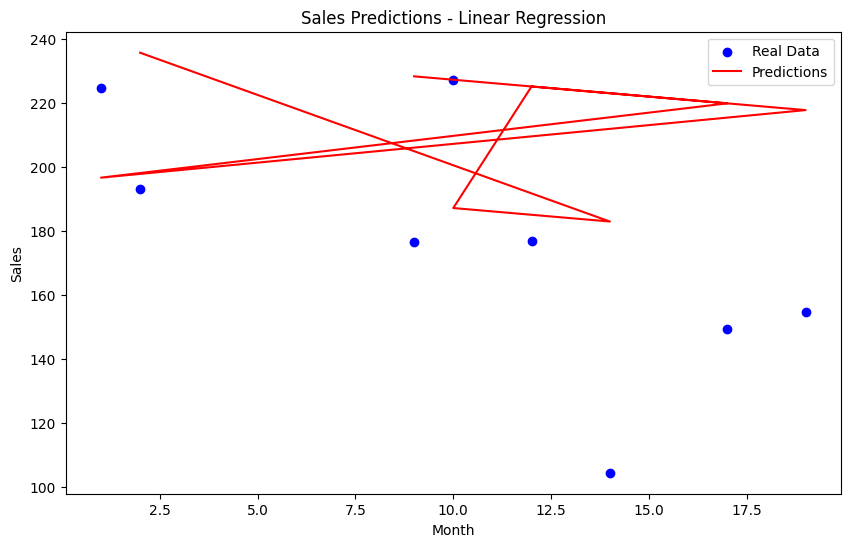

In [15]:
model_sales = LinearRegression()
model_sales.fit(X_train_sales, y_train_sales)

y_pred_sales = model_sales.predict(X_test_sales)

mse_sales = mean_squared_error(y_test_sales, y_pred_sales)

r2_sales = r2_score(y_test_sales, y_pred_sales)

print(f'Mean Squared Error (MSE): {mse_sales}')
print(f'R2 Score (R²): {r2_sales}')
plt.figure(figsize=(10, 6))
plt.scatter(X_test_sales['Months'], y_test_sales, color='blue', label='Real Data')
plt.plot(X_test_sales['Months'], y_pred_sales, color='red', label='Predictions')
plt.title('Sales Predictions - Linear Regression')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# **Part 2: Fraud Detection**

1. Database Creation and Manipulation: Generate a fictitious database with financial transactions and a variable indicative of fraud.
2. Data Preprocessing: Convert categorical variables to numeric variables and split the data.
3. Model Building and Evaluation: Create and train a logistic regression model.
Make predictions and evaluate performance using classification metrics.

In [22]:
np.random.seed(42)

values = np.random.normal(1000, 200, 1000)
locations = np.random.choice(['Location_A', 'Location_B', 'Location_C'], size=1000)
frauds = np.random.choice([0, 1], size=1000)  # 0 = Non fraud, 1 = Fraud

df_frauds = pd.DataFrame({
    'Values': values,
    'Locations': locations,
    'Frauds': frauds
})

In [23]:
df_frauds = pd.get_dummies(df_frauds, columns=['Locations'])
X_frauds = df_frauds.drop('Frauds', axis=1)
y_frauds = df_frauds['Frauds']
X_train_frauds, X_test_frauds, y_train_frauds, y_test_frauds = train_test_split(X_frauds, y_frauds, test_size=0.3, random_state=42)

model_frauds = LogisticRegression()
model_frauds.fit(X_train_frauds, y_train_frauds)
y_pred_frauds = model_frauds.predict(X_test_frauds)

In [25]:
accuracy_frauds = accuracy_score(y_test_frauds, y_pred_frauds)
confusion = confusion_matrix(y_test_frauds, y_pred_frauds)
report = classification_report(y_test_frauds, y_pred_frauds)

print(f'Accuracy Score: {accuracy_frauds}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

Accuracy Score: 0.49666666666666665
Confusion Matrix:
[[120  23]
 [128  29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.84      0.61       143
           1       0.56      0.18      0.28       157

    accuracy                           0.50       300
   macro avg       0.52      0.51      0.45       300
weighted avg       0.52      0.50      0.44       300

